In [1]:
# Importing libraries
import pandas as pd  # Pandas library deal with dataframe and null value treatment
import numpy as np   # numpy library deal with arrays
import matplotlib.pyplot as plt # Matplotlib library using for visulization
%matplotlib inline
import seaborn as  sns # Seaborn library using for visulization

In [2]:
# Loading Dataset

df1 =  pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')
print('This is the dataframe')
df1.head()

This is the dataframe


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
# We check the size of dataset using shape()
print('This is the size of the dataframe')
df1.shape

This is the size of the dataframe


(11251, 15)

In [7]:
# info() gives the all information of dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
# df.describe() gives the statistical information about dataset

df1[['Age','Orders','Amount','Status','unnamed1']].describe()

,Age,Orders,Amount,Status,unnamed1
count,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,35.421207,2.489290,9453.610858,NaN,NaN
std,12.754122,1.115047,5222.355869,NaN,NaN
min,12.000000,1.000000,188.000000,NaN,NaN
25%,27.000000,1.500000,5443.000000,NaN,NaN
50%,33.000000,2.000000,8109.000000,NaN,NaN
75%,43.000000,3.000000,12675.000000,NaN,NaN
max,92.000000,4.000000,23952.000000,NaN,NaN


#### Data Cleaning Process

In [ ]:
# Drop the unwanted columns beacuse we no longer need this columns.These columns give only null values.

df1.drop(['Status','unnamed1'],axis=1,inplace=True)
df1

In [19]:
# Using this below function we will get sum of null values


df1.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
# Drop the null values

df1.dropna(inplace=True)

In [21]:
# Here we change the datatype

df1['Amount']=df1['Amount'].astype('int')

In [22]:
df1['Amount'].dtype

dtype('int32')

In [24]:
# Use describe() for specific columns

df1[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [14]:
# Here we can change the Marital Status(0=Unmarried,1=Married)

df1['Marital_Status'] = df1['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})
df1.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Exploratory Data Analysis

#### Analysis 1

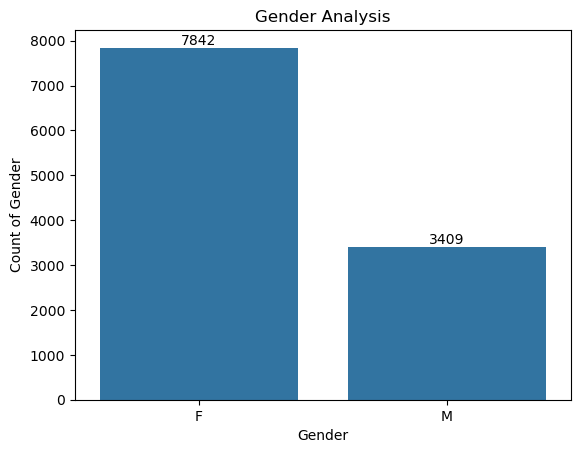

In [10]:
# Describing the customer as per their Gender

ax = sns.countplot(x = 'Gender',data = df1)
plt.ylabel('Count of Gender')
plt.title('Gender Analysis')

for bars in ax.containers:
     ax.bar_label(bars)
plt.show()
plt.savefig('Gender Distribution.png')

#### Analysis 2

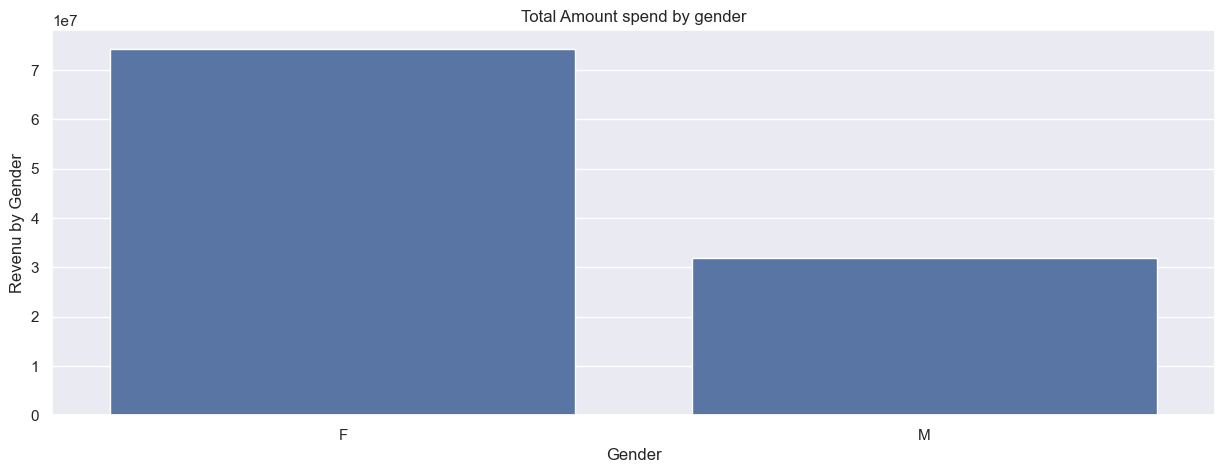

In [7]:
# Checking purchsing power as per the gender
# Total Amount spend by gender

sales_gen = df1.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.ylabel('Revenu by Gender')
plt.title('Total Amount spend by gender')
plt.show()
plt.savefig('Total Amount spend by gender.png')

*From above graphs we can see that most of the buyers are females and even the purchasing 
power of females are greater than men*

#### Analysis 3

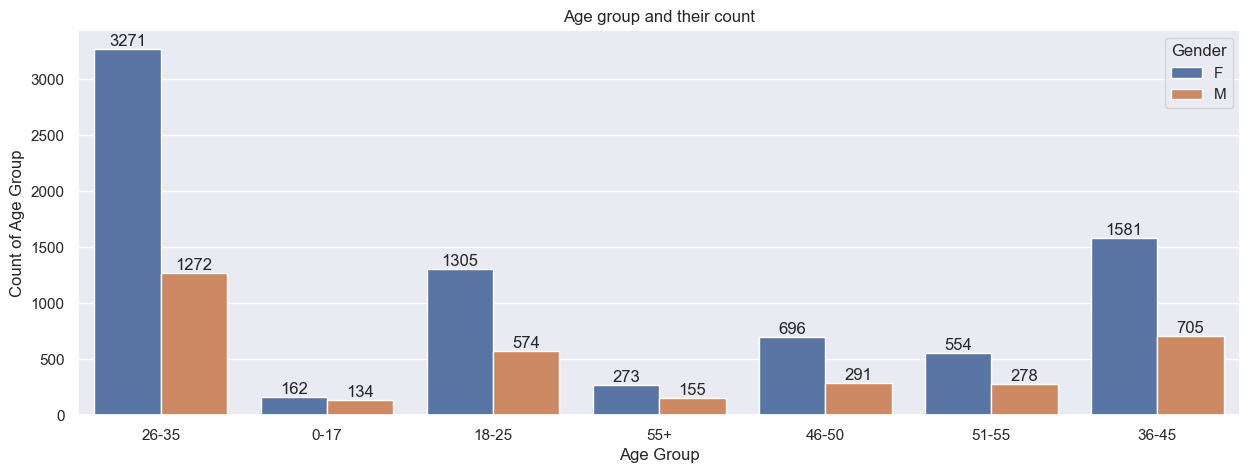

In [6]:
# Describing the customer according to their age group and count of their age group

ax = sns.countplot(data = df1, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

plt.ylabel('Count of Age Group')
plt.title('Age group and their count')
plt.show()
plt.savefig('Age group and their count.png')

*From the bar graph above, we can see that the age group 26–35 (youngsters) has the highest number of buyers,
and within this group, females are higher in number than males so from this analysis we can prioritize our young customers*

#### Analysis 4

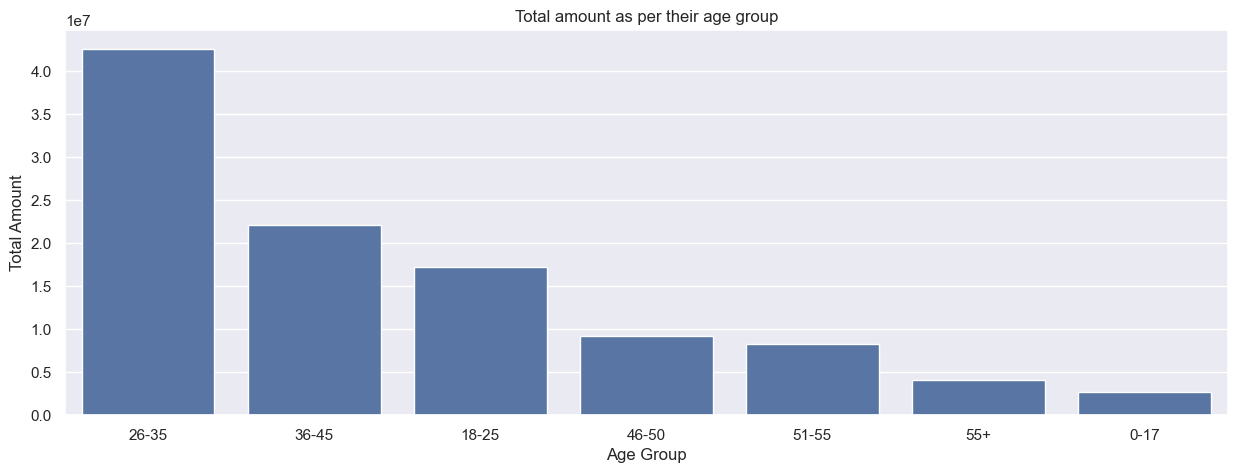

In [5]:
# Describing the total amount according to their age group

sales_age = df1.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.ylabel('Total Amount')
plt.title('Total amount as per their age group')
plt.show()
plt.savefig('Total amount as per their age group.png')

 *From above graphs we can see that most of the buyers are of age group between 26–35 (youngsters) yrs and also
 we can see the minimum customer buyers in the age group of 0-17(childrens and teenagers so we can generate the very less amount of revenue from 
 this age group customer*

#### Analysis 5

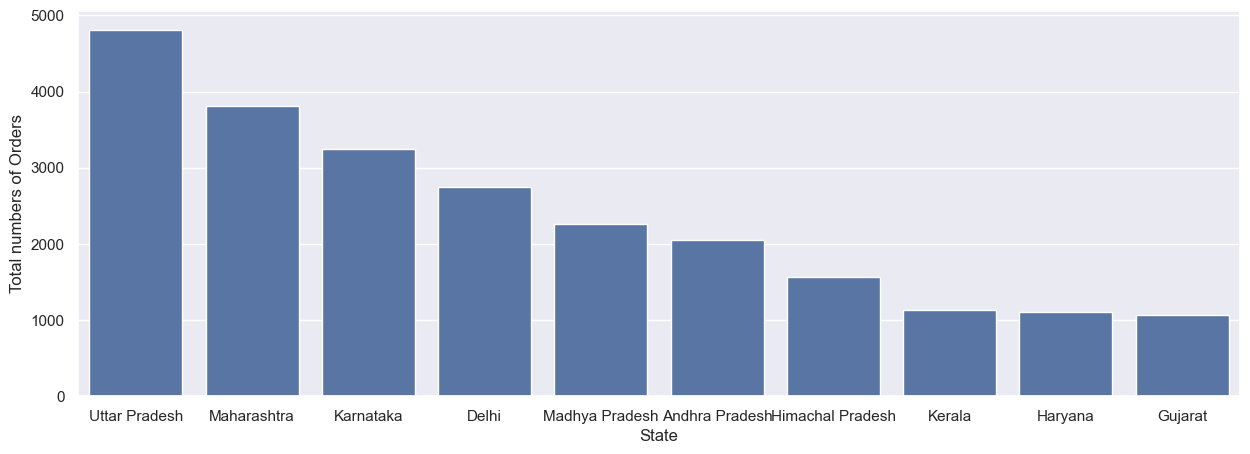

In [3]:
# Describing the total number of orders from top 10 states

sales_state = df1.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.ylabel('Total numbers of Orders')
plt.title('Total number of orders as per States')
plt.show()
plt.savefig('Total number of orders as per States.png')

*From above bar graph we can see the Uttar Pradesh is top number of order state*

#### Analysis 6

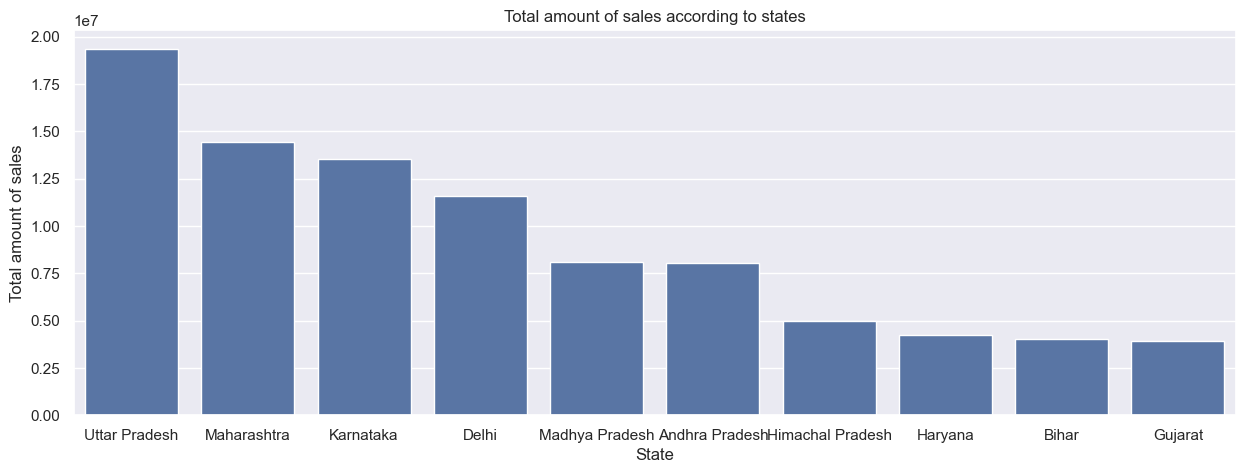

In [11]:
# Describing the total amount of sales according to states

sales_state = df1.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.ylabel('Total amount of sales')
plt.title('Total amount of sales according to states')
plt.show()
plt.savefig('Total amount of sales according to states.png')

 *From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

#### Analysis 7

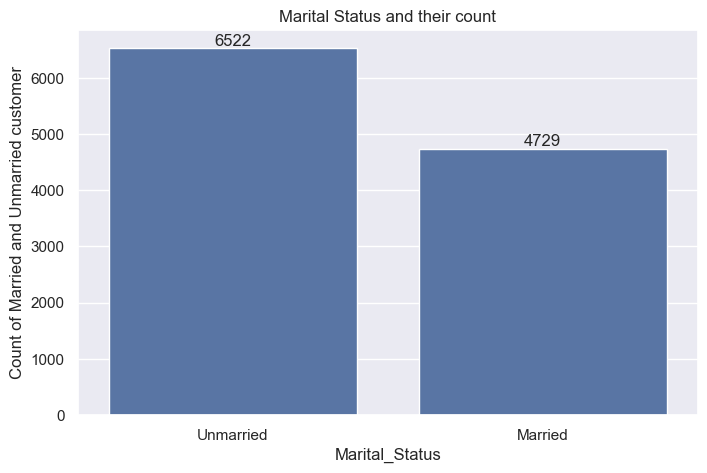

In [21]:
# Describing the Marital Status and their count

ax = sns.countplot(data = df1, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(8,5)})
for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel('Count of Married and Unmarried customer')
plt.title('Marital Status and their count')
plt.show()
plt.savefig('Describing the count of Married and Unmarried Customer.png')

#### Analysis 8

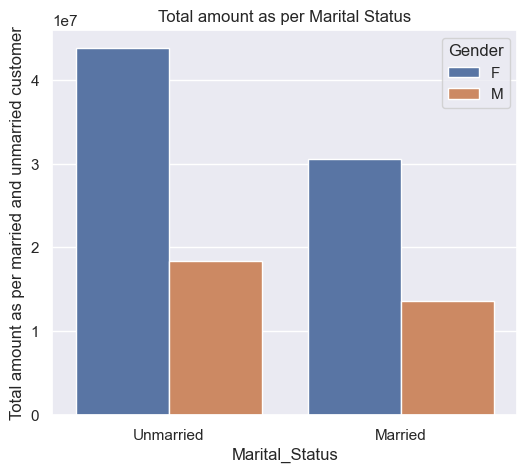

In [23]:
# Describing the total amount as per Marital Status

sales_state = df1.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.ylabel('Total amount as per married and unmarried customer')
plt.title('Total amount as per Marital Status')
plt.show()
plt.savefig('Total amount as per Marital Status.png')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

#### Analysis 9

#### Occupation of customers

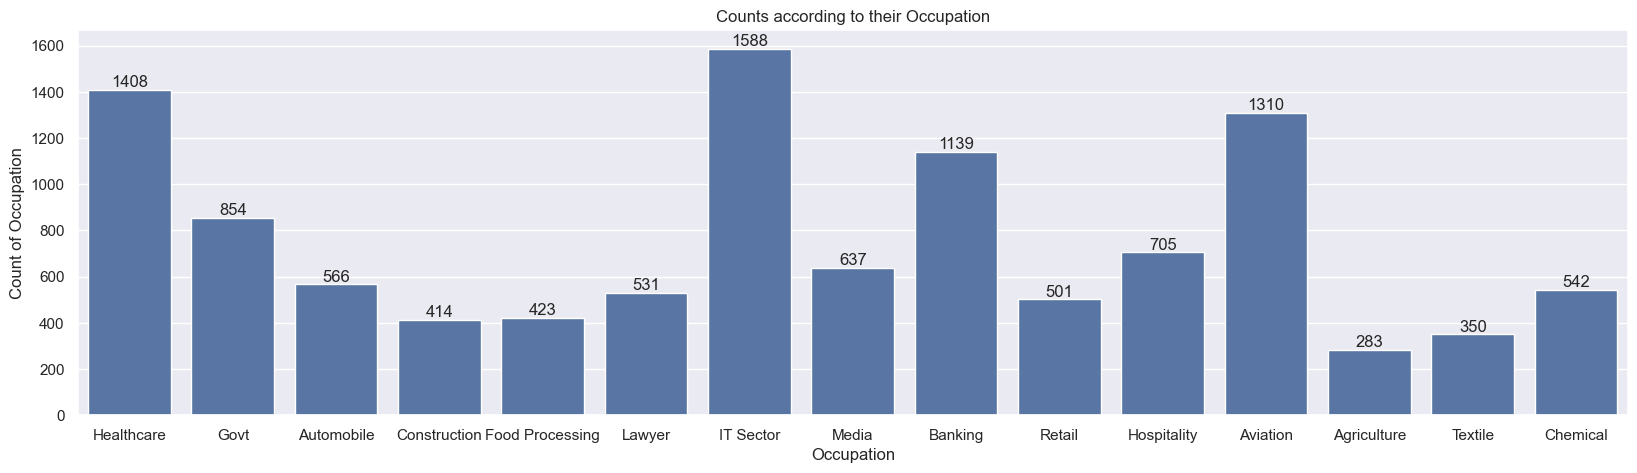

In [25]:
# Describing the count of Occupation of customer

sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(data = df1, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel('Count of Occupation')
plt.title('Counts according to their Occupation')
plt.show()
plt.savefig('Counts according to their Occupations.png')

#### Analysis 10

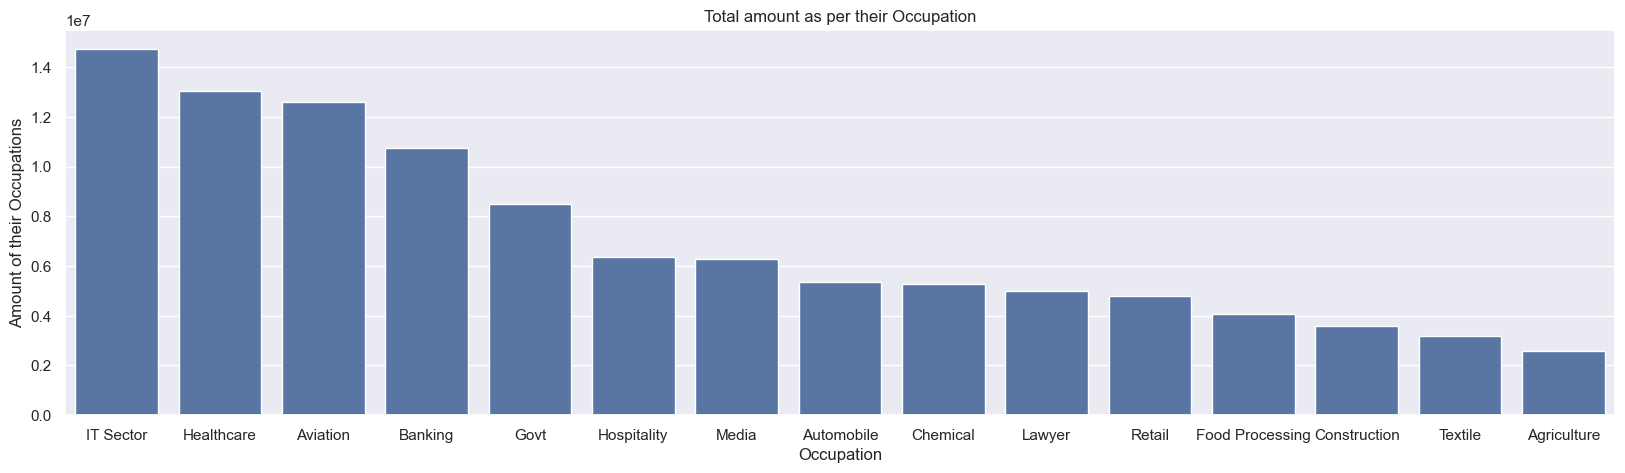

In [27]:
# Describing total amount as per their Occupation

sales_state = df1.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.ylabel('Amount of their Occupations')
plt.title('Total amount as per their Occupation')
plt.show()
plt.savefig('Total amount as per their Occupation.png')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

#### Analysis 11

#### Product Category

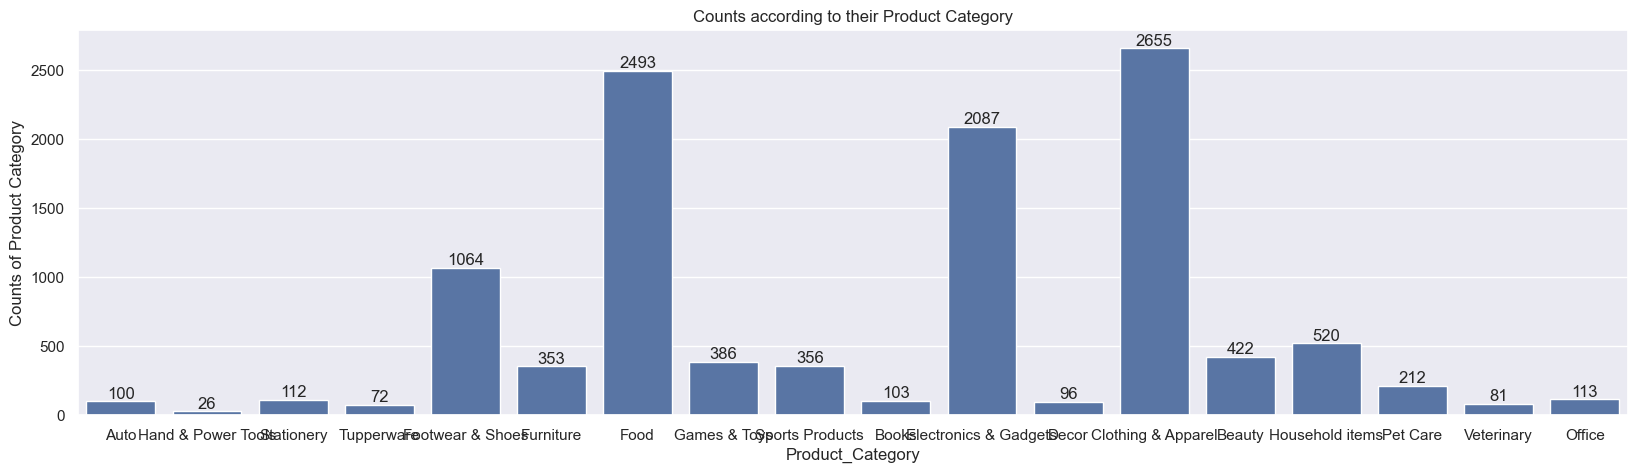

In [29]:
# Describing the counts according to their Product Category
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.countplot(data = df1, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.ylabel('Counts of Product Category')
plt.title('Counts according to their Product Category')
plt.show()
plt.savefig('Counts according to their Product Category.png')

#### Analysis 12

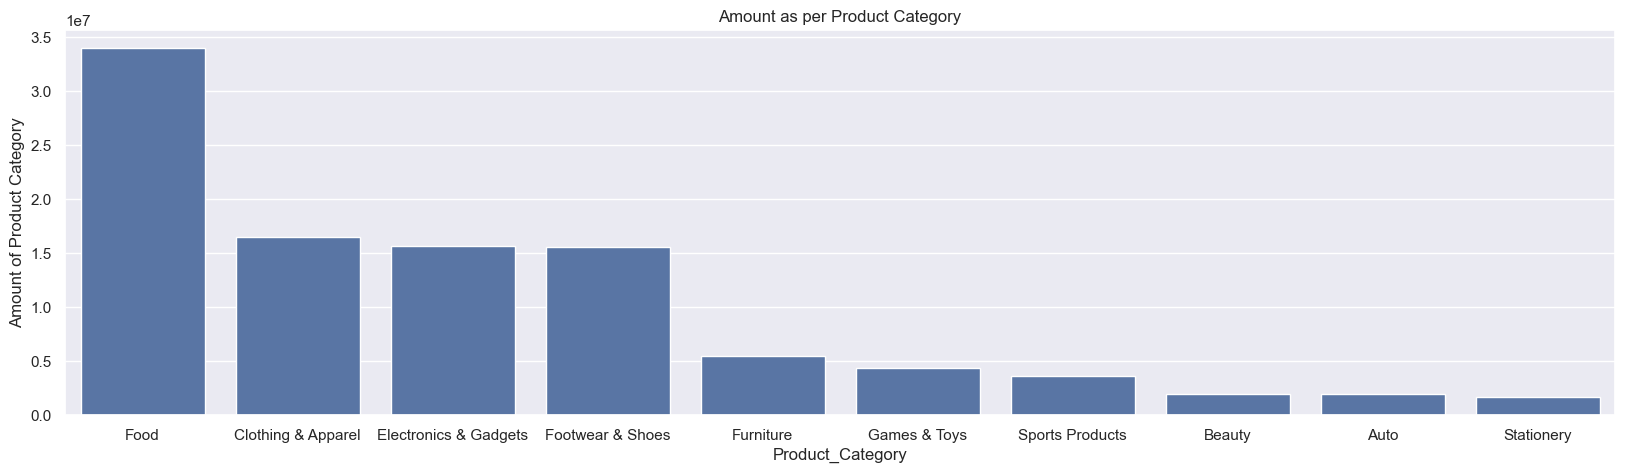

In [31]:
# Describing the amount as per Product Category

sales_state = df1.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
plt.ylabel('Amount of Product Category')
plt.title('Amount as per Product Category')
plt.show()
plt.savefig('Amount of their Product Category.png')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

#### Analysis 13

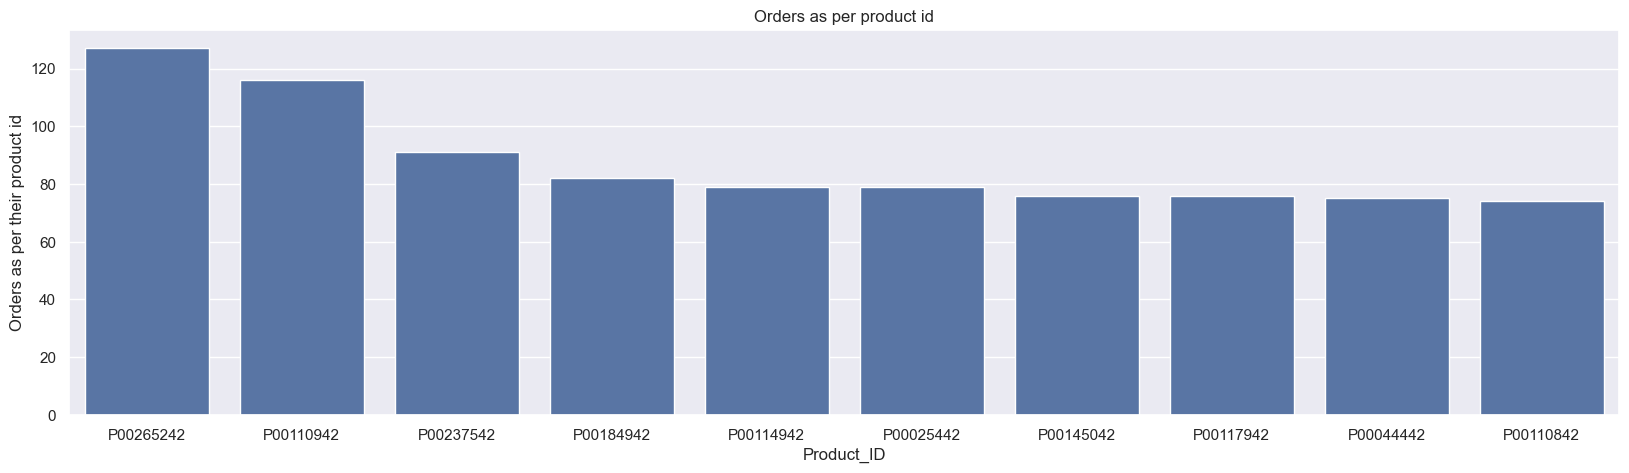

In [33]:
# Describing the Orders as per product id

sales_state = df1.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.ylabel('Orders as per their product id')
plt.title('Orders as per product id')
plt.show()
plt.savefig('Orders as per product id.png')

#### Analysis 14

<Figure size 600x500 with 0 Axes>

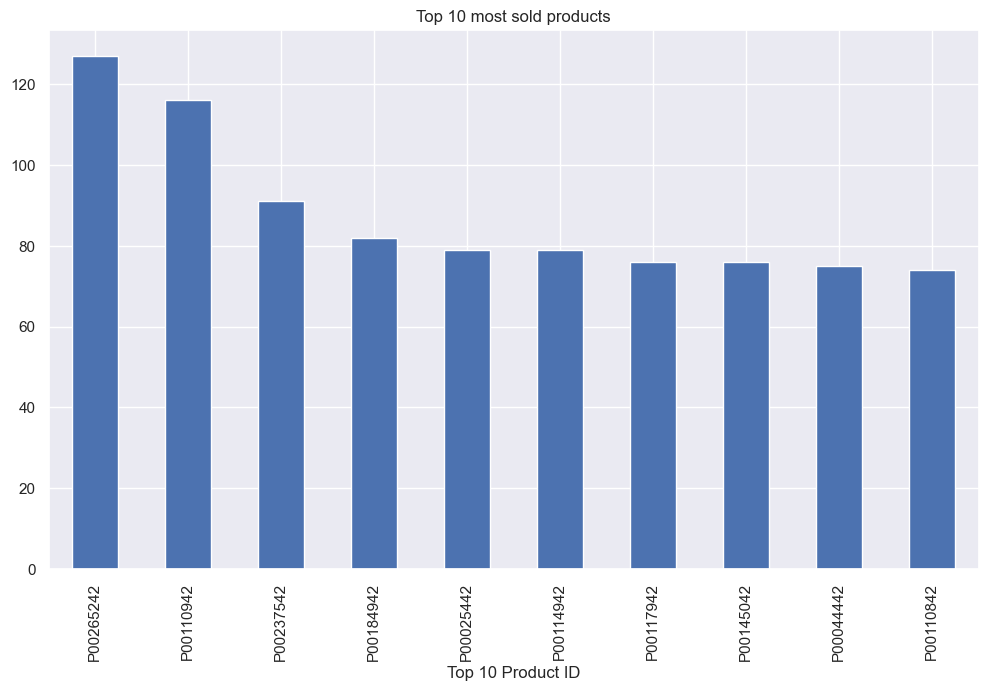

In [34]:
# Desccribing top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df1.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Top 10 Product ID')
plt.title('Top 10 most sold products')
plt.show()
plt.savefig('Top 10 most sold products.png')

#### Conclusion

*The majority of female customers fall within the 26-35 age group, indicating that young adults are the most active buyers.

Uttar Pradesh, Maharashtra, and Karnataka lead in terms of the highest number of orders.

Among occupations, the IT, Healthcare, and Aviation sectors contribute the most to overall purchases.

Popular product categories include Food, Clothing, and Electronics, suggesting these areas 
should be prioritized for promotions and inventory.

On the other hand, customers in the 0–17 and 55+ age groups are significantly less active.

Customers from the Agriculture sector show lower purchasing power, indicating a reduced need 
for advertisement spend in this segment..*